<a href="https://colab.research.google.com/github/ms-jayanth/Annalect_Assignment/blob/main/Data_Analysis_Campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Nesessary Libraries and Importing Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the Excel file
excel_file = pd.ExcelFile("/content/sample_data/Campaign data.xlsx")
print(excel_file.sheet_names)


['Table 1', 'Table 2']


In [3]:
# Load each sheet (assuming Sheet1 and Sheet2)
campaign_data = pd.read_excel(excel_file, sheet_name=0)
message_data = pd.read_excel(excel_file, sheet_name=1)

In [4]:
campaign_data.head(5)

,Date,Data source,Campaign,Media Type,City,Metric,Value
0,2019-12-30,Pinterest,Kicks campaign 2,Display,Colorado Springs-Pueblo,Impressions,1.0
1,2019-12-30,Pinterest,Kicks campaign 2,Display,Colorado Springs-Pueblo,Media Cost,0.0
2,2019-12-30,Pinterest,Kicks campaign 2,Display,Colorado Springs-Pueblo,Clicks,0.0
3,2019-12-30,Pinterest,Kicks campaign 2,Display,Sacramnto-Stkton-Modesto,Impressions,1.0
4,2019-12-30,Pinterest,Kicks campaign 2,Display,Sacramnto-Stkton-Modesto,Media Cost,0.0


In [5]:
message_data.head(5)

,Campaign,Message type,Model
0,Sentra campaign 2,Future Market,Sentra
1,Sentra campaign 4,Future Market,Sentra
2,Sentra campaign 3,Future Market,Sentra
3,Sentra campaign 1,Future Market,Sentra
4,Altima campaign 1,Future Market,Altima


In [6]:
campaign_data.shape, message_data.shape

((123699, 7), (58, 3))

###1. Find out the top 5 months in terms of impressions

In [7]:
impressions_data=campaign_data[campaign_data['Metric']=='Impressions']
impressions_data.head()

,Date,Data source,Campaign,Media Type,City,Metric,Value
0,2019-12-30,Pinterest,Kicks campaign 2,Display,Colorado Springs-Pueblo,Impressions,1.0
3,2019-12-30,Pinterest,Kicks campaign 2,Display,Sacramnto-Stkton-Modesto,Impressions,1.0
6,2019-12-30,Pinterest,Kicks campaign 1,Online Video,New York,Impressions,2.0
9,2019-12-30,Pinterest,Kicks campaign 1,Online Video,Atlanta,Impressions,1.0
12,2019-12-30,Pinterest,Kicks campaign 1,Online Video,Indianapolis,Impressions,2.0


In [8]:
top_5_months = impressions_data.groupby('Date')['Value'].sum().sort_values(ascending=False).head(5).reset_index()
top_5_months

,Date,Value
0,2021-09-20,40235829.0
1,2021-09-13,40232975.0
2,2020-10-26,29913597.0
3,2020-10-19,27410483.0
4,2020-03-09,25678988.0


###2. Which model has maximum impressions?

In [9]:
#Using Impression data and joing with message table
impressions_msg_table = pd.merge(impressions_data, message_data, on='Campaign', how='left')
impressions_msg_table.head()

,Date,Data source,Campaign,Media Type,City,Metric,Value,Message type,Model
0,2019-12-30,Pinterest,Kicks campaign 2,Display,Colorado Springs-Pueblo,Impressions,1.0,Near Market,Kicks
1,2019-12-30,Pinterest,Kicks campaign 2,Display,Sacramnto-Stkton-Modesto,Impressions,1.0,Near Market,Kicks
2,2019-12-30,Pinterest,Kicks campaign 1,Online Video,New York,Impressions,2.0,Near Market,Kicks
3,2019-12-30,Pinterest,Kicks campaign 1,Online Video,Atlanta,Impressions,1.0,Near Market,Kicks
4,2019-12-30,Pinterest,Kicks campaign 1,Online Video,Indianapolis,Impressions,2.0,Near Market,Kicks


In [10]:
model_impressions=impressions_msg_table.groupby('Model')['Value'].sum().sort_values(ascending=False).head(1).reset_index()

In [11]:
model_impressions

,Model,Value
0,Pathfinder,275832034.0


###3. Find out the top 3 campaigns in terms of impressions for every message type

In [12]:
#Using impressions_msg_table
camp_msg_data = impressions_msg_table.groupby(['Message type', 'Campaign'])['Value'].sum().reset_index()
camp_msg_data.head()

,Message type,Campaign,Value
0,Future Market,Altima campaign 1,35863660.0
1,Future Market,Altima campaign 2,7200627.0
2,Future Market,Altima campaign 3,45451489.0
3,Future Market,Altima campaign 4,380995.0
4,Future Market,Altima campaign 5,1176593.0


In [13]:
top_camp_msg_data = camp_msg_data.sort_values(['Message type', 'Value'], ascending=[True, False])
top3_camp_msg_data  = top_camp_msg_data.groupby('Message type').head(3)

top3_camp_msg_data.head().reset_index()

,index,Message type,Campaign,Value
0,2,Future Market,Altima campaign 3,45451489.0
1,0,Future Market,Altima campaign 1,35863660.0
2,7,Future Market,Kicks campaign 4,33664998.0
3,24,Near Market,Armada campaign 2,118817195.0
4,30,Near Market,Pathfinder campaign 2,115286607.0


###4. Does the campaign with maximum impressions also have maximum clicks?

In [14]:
camp_metric_data = campaign_data.groupby(['Campaign', 'Metric'])['Value'].sum().unstack().fillna(0)
camp_metric_data.head()

Metric,Clicks,Impressions,Media Cost
Campaign,,,
Altima campaign 1,148715.0,35863660.0,489477.29
Altima campaign 2,2795.0,7200627.0,74693.85
Altima campaign 3,13412.0,45451489.0,376369.35
Altima campaign 4,3968.0,380995.0,6000.05
Altima campaign 5,13400.0,1176593.0,18391.45


In [15]:
# Getting campaigns with max impressions and max clicks
max_impr_campaign = camp_metric_data['Impressions'].idxmax()
max_click_campaign = camp_metric_data['Clicks'].idxmax()
print("Campaign with max impressions:", max_impr_campaign),
print("Campaign with max clicks:", max_click_campaign)

Campaign with max impressions: Armada campaign 2
Campaign with max clicks: Armada campaign 2


In [16]:
if max_impr_campaign == max_click_campaign:
    print("Yes, the campaign with max impressions also has max clicks.")
else:
    print("No, they are different.")

Yes, the campaign with max impressions also has max clicks.


###5. Find out the top 3 campaigns in terms of CPM (CPM stands for cost per mile which means cost per 1000 impressions.
CPM = total media cost/total impressions * 1000)

In [17]:
Metric_data = pd.pivot_table(data=campaign_data, index='Campaign', columns='Metric', values='Value', aggfunc='sum')
Metric_data.head()

Metric,Clicks,Impressions,Media Cost
Campaign,,,
Altima campaign 1,148715.0,35863660.0,489477.29
Altima campaign 2,2795.0,7200627.0,74693.85
Altima campaign 3,13412.0,45451489.0,376369.35
Altima campaign 4,3968.0,380995.0,6000.05
Altima campaign 5,13400.0,1176593.0,18391.45


In [18]:
Metric_data['CPM'] = (Metric_data['Media Cost']/Metric_data['Impressions']*1000).round(2)
Metric_data.head()

Metric,Clicks,Impressions,Media Cost,CPM
Campaign,,,,
Altima campaign 1,148715.0,35863660.0,489477.29,13.65
Altima campaign 2,2795.0,7200627.0,74693.85,10.37
Altima campaign 3,13412.0,45451489.0,376369.35,8.28
Altima campaign 4,3968.0,380995.0,6000.05,15.75
Altima campaign 5,13400.0,1176593.0,18391.45,15.63


In [19]:
# Top 3 campaigns by CPM
top3_cpm = Metric_data.sort_values(by='CPM', ascending=False).head(3)
top3_cpm[['CPM']]

Metric,CPM
Campaign,
Pathfinder campaign 3,18.50
Pathfinder campaign 5,18.30
Pathfinder campaign 7,18.19


###6. What is the monthly average media cost for different media types?

In [20]:
cost_data = campaign_data[campaign_data['Metric'] == 'Media Cost']
cost_data.head()

,Date,Data source,Campaign,Media Type,City,Metric,Value
1,2019-12-30,Pinterest,Kicks campaign 2,Display,Colorado Springs-Pueblo,Media Cost,0.0
4,2019-12-30,Pinterest,Kicks campaign 2,Display,Sacramnto-Stkton-Modesto,Media Cost,0.0
7,2019-12-30,Pinterest,Kicks campaign 1,Online Video,New York,Media Cost,0.0
10,2019-12-30,Pinterest,Kicks campaign 1,Online Video,Atlanta,Media Cost,0.0
13,2019-12-30,Pinterest,Kicks campaign 1,Online Video,Indianapolis,Media Cost,0.0


In [21]:
# Extract month
cost_data['Month'] = cost_data['Date'].dt.to_period('M')
cost_data.head()

,Date,Data source,Campaign,Media Type,City,Metric,Value,Month
1,2019-12-30,Pinterest,Kicks campaign 2,Display,Colorado Springs-Pueblo,Media Cost,0.0,2019-12
4,2019-12-30,Pinterest,Kicks campaign 2,Display,Sacramnto-Stkton-Modesto,Media Cost,0.0,2019-12
7,2019-12-30,Pinterest,Kicks campaign 1,Online Video,New York,Media Cost,0.0,2019-12
10,2019-12-30,Pinterest,Kicks campaign 1,Online Video,Atlanta,Media Cost,0.0,2019-12
13,2019-12-30,Pinterest,Kicks campaign 1,Online Video,Indianapolis,Media Cost,0.0,2019-12


In [22]:
avg_cost_media = pd.pivot_table(data=cost_data, index='Month', columns='Media Type', values='Value', aggfunc='mean')
avg_cost_media

Media Type,Display,Online Video
Month,,
2019-12,0.000000,0.000000
2020-01,0.000000,0.000000
2020-02,424.566390,0.000000
2020-03,411.136057,8.695333
2020-04,0.000000,0.000000
2020-05,0.000000,NaN
2020-06,0.000000,9.997719
2020-07,0.000000,26.610211
2020-08,0.000000,80.534931


###7.Which media type is more expensive in terms of CPM?

In [23]:
Metric_media_data = pd.pivot_table(data=campaign_data, index='Media Type', columns='Metric', values='Value', aggfunc='sum')
Metric_media_data['CPM']=(Metric_media_data['Media Cost']/Metric_media_data['Impressions']*1000).round(2)
Metric_media_data.head()

Metric,Clicks,Impressions,Media Cost,CPM
Media Type,,,,
Display,301094.0,178311600.0,1064136.34,5.97
Online Video,1802669.0,674263903.0,6836809.63,10.14


In [24]:
print('Most expensive media type:',Metric_media_data['CPM'].idxmax(),' with value:', Metric_media_data['CPM'].max())

Most expensive media type: Online Video  with value: 10.14


###8. When would you use a Pie chart, a Bar chart and a Line Chart? Use the given dataset and provide an example for each type of chart.

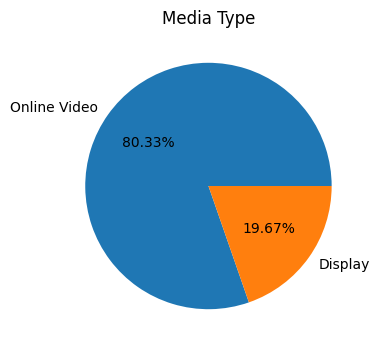

In [25]:
#Pie Chart: We use pie charts to visualize categorical data as they show the proportion of each category as a part of a whole.

plt.figure(figsize=(6,4))
plt.pie(campaign_data['Media Type'].value_counts(), labels=['Online Video','Display'], autopct='%1.2f%%')
plt.title("Media Type")
plt.show()

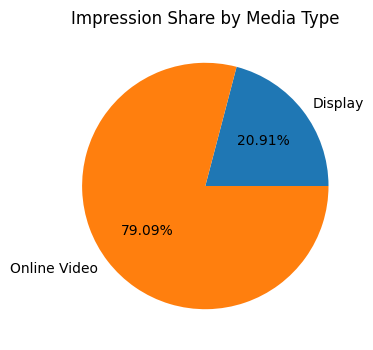

In [26]:
data_for_pie = campaign_data[campaign_data['Metric'] == 'Impressions'].groupby('Media Type')['Value'].sum()

plt.figure(figsize=(6,4))
plt.pie(data_for_pie, labels=data_for_pie.index, autopct='%1.2f%%')
plt.title("Impression Share by Media Type")
plt.show()

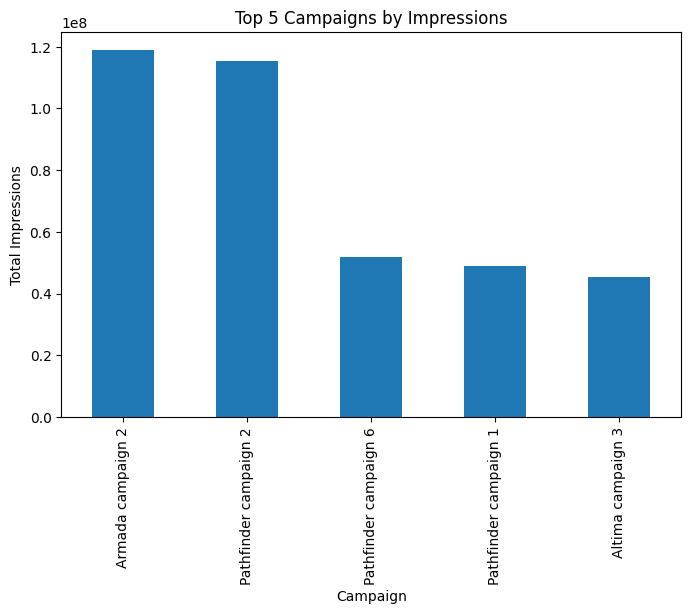

In [27]:
#Bar charts: These are used to compare categories side by side because they clearly show differences in values across groups.

data_for_bar = campaign_data[campaign_data['Metric'] == 'Impressions'].groupby('Campaign')['Value'].sum().nlargest(5)

plt.figure(figsize=(8, 5))
data_for_bar.plot(kind='bar')
plt.title("Top 5 Campaigns by Impressions")
plt.ylabel("Total Impressions")
plt.xlabel("Campaign")
plt.show()


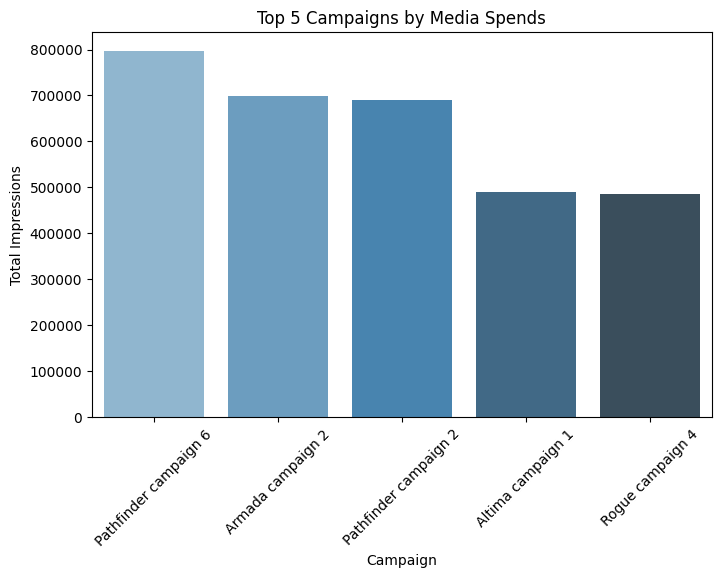

In [28]:

data_for_bar_2 = campaign_data[campaign_data['Metric'] == 'Media Cost'].groupby('Campaign')['Value'].sum().nlargest(5).reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=data_for_bar_2, x='Campaign', y='Value', palette='Blues_d')
plt.title("Top 5 Campaigns by Media Spends")
plt.ylabel("Total Impressions")
plt.xlabel("Campaign")
plt.xticks(rotation=45)
plt.show()

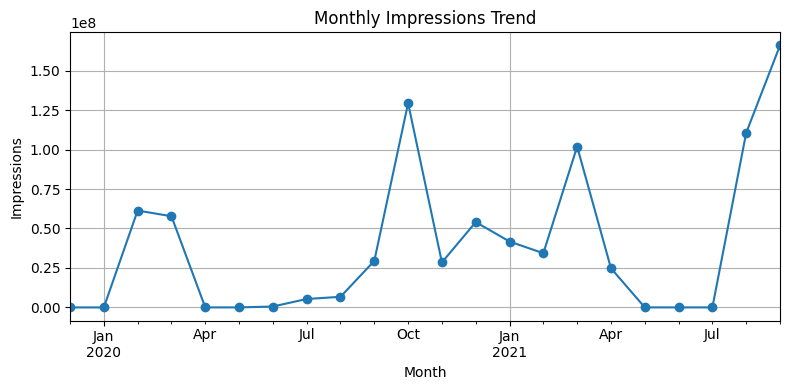

In [29]:
#Line charts are used to see trends over time because they show data points connected in a continuous flow.

data_for_line = campaign_data[campaign_data['Metric'] == 'Impressions']
data_for_line['Month'] = pd.to_datetime(data_for_line['Date'], dayfirst=True).dt.to_period('M')
monthly_trend = data_for_line.groupby('Month')['Value'].sum()

monthly_trend.plot(kind='line', marker='o', figsize=(8, 4))
plt.title("Monthly Impressions Trend")
plt.ylabel("Impressions")
plt.xlabel("Month")
plt.grid(True)
plt.tight_layout()
plt.show()
